In [1]:
import random
import math
import numpy as np

from matplotlib import pyplot as plt

L = 2 #liczba wartw
mi = 0.1 #wsp uczenia

N = [2,2,1] #neurony w warstwach

w = [
     [],
    [ [], [0,0,0], [0,0,0]],
    [ [], [0,0,0]]
  ]

s = [
     [],
     [None, 0,0],
     [None, 0]
   ]

x = [
     [],
     [-1, 0, 0],
     [-1, 0, 0]
    ]

y = [
     [],
     [None, 0,0],
     [None,0]
   ]

e = [
        [],
        [None, 0,0],
        [None,0]
   ]

dlt = [
        [],
        [None, 0,0],
        [None, 0]
    ]

In [ ]:
def losuj_w():
    for k in range(1, 1+L):
        for i in range(1, N[k]+1):
            for j in range(0, N[k-1]+1):
                w[k][i][j] = random.random()*2-1

def f(s): #simgoidalna aktywacja
    return 1/(1+math.exp(-s))

def f_poch(s):
    return f(s)*(1-f(s))

def licz_y(u):
    for k in range(1,L+1):
        for i in range(1, N[k-1]+1):
            if k ==1: x[k][i] = u[i-1]
            else:  x[k][i] = y[k-1][i]

        for i in range(1, N[k]+1):
            s[k][i]=0
            for j in range(0, N[k-1]+1):
                s[k][i]+= w[k][i][j]*x[k][j]
            y[k][i] = f(s[k][i])
    return y[L][1]


def licz_e(d):
    for k in range(L,0, -1):
        for i in range(1, N[k]+1):
            if k == L:
                e[k][i] = d - y[k][i]
            else:
                e[k][i]=0
                for j in range(1, N[k+1]+1):
                    e[k][i]+=dlt[k+1][j]*w[k+1][j][i]
            dlt[k][i] = e[k][i]* f_poch(s[k][i])

In [ ]:
u = [[0,0], [0,1], [1,0], [1,1] ]

d = [0,1,1,0]

def predict(u):
    return licz_y(u)

def mse(): #blad sredniokwadratowy
    suma = 0
    for i in range(len(d)):
        pred = predict(u[i])
        suma += (d[i]- pred)**2
    return suma/(len(d))

def showPredict():
    for i in range(len(d)):
        pred = predict(u[i])
        print(f'input {u[i][0], u[i][1]}: {pred}')

Training ended after 3427 epochs.
 The weights: [[], [[], [-1.8942721548433301, -5.487408685972307, -5.578676987586923], [-4.857782280434658, -3.35445593057697, -3.3620090626437142]], [[], [2.794715798510897, -6.935001207691177, 6.396335527031237]]] 
Blad: 0.00999301086403417


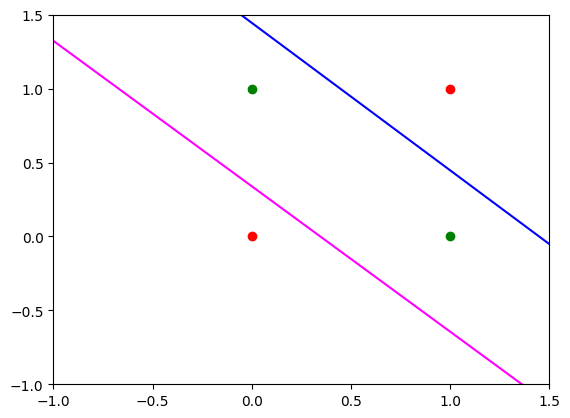

input (0, 0): 0.07756679700166487
input (0, 1): 0.9055815465099183
input (1, 0): 0.9048442953336239
input (1, 1): 0.12643568708646258


In [ ]:
def main(epochs = 20000):
    losuj_w()
    curr_ep = 0
    for epoch in range(epochs):
        for nn in range(len(u)):
            licz_y(u[nn])
            licz_e(d[nn])

            for k in range(L, 0, -1):
                for i in range(1, N[k]+1):
                    for j in range(0, N[k-1]+1):
                        w[k][i][j] = w[k][i][j] + 2* mi *dlt[k][i] * x[k][j]

        if mse() < 1e-2: break
        curr_ep+=1
    print(f"Training ended after {curr_ep} epochs.\n The weights: {w} \nBlad: {mse()}")

def show_chart():
    points = np.linspace((-1,-1), (1.5,1.5))
    yy = -(w[1][1][1]/w[1][1][2]) * points[:,0] + (w[1][1][0]/w[1][1][2])
    yy1 = -(w[1][2][1]/w[1][2][2]) * points[:,0] + (w[1][2][0]/w[1][2][2])
    plt.plot(points[:,0],yy, color='magenta')
    plt.plot(points[:,0],yy1, color='blue')

    for i in range(len(u)):
        color = 'red'
        if d[i]==1:
            color = 'green'
        plt.plot(u[i][0], u[i][1], 'o', color=color)

    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.show()

main()
show_chart()
showPredict()